<a href="https://colab.research.google.com/github/KamathN593/LockedInKeyboard/blob/master/EyePositionAlg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np

def parse_eye_file(eye_file_path):
    with open(eye_file_path, 'r') as file:
        next(file)  # Skip the first line
        content = file.read()

        # Split the content by spaces
        numbers = content.split()

        # Convert each split string into an integer
        numbers = [int(num) for num in numbers]  # or float(num) for float numbers

    eye_data = [numbers[0], numbers[1],numbers[2], numbers[3]]

    return eye_data

# Initialize list to store pairs of eye positions
eye_positions = []

for i in range(1521):
    eye_file_path = f"/content/drive/MyDrive/Eye_Position/Eye_data/BioID_{i:04}.eye"
    try:
        eye_data = parse_eye_file(eye_file_path)
        print(f"Eye Position: {eye_file_path[0]}")
        # Append the pair of eyes as a tuple to the eye_positions list
        eye_positions.append([eye_data])
    except FileNotFoundError:
        print(f"File not found: {eye_file_path}")

# Convert the eye_positions list to a NumPy array
eye_positions_array = np.array(eye_positions)

print(eye_positions_array)

Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye: [156, 134]
Left Eye: [228, 137], Right Eye:

In [99]:
image_paths = []
for i in range(1521):
  image_path = f"/content/drive/MyDrive/Eye_Position/Eye_data/BioID_{i:04}.pgm"
  image_paths.append(image_path)

print(image_paths)

['/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0000.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0001.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0002.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0003.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0004.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0005.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0006.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0007.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0008.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0009.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0010.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0011.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0012.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0013.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0014.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_00

In [100]:
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
image_paths_train, image_paths_test, eye_positions_train, eye_positions_test = train_test_split(
    image_paths, eye_positions, test_size=0.2, random_state=42
)

print("Training Image Paths:", image_paths_train)
print("Test Image Paths:", image_paths_test)
print("Training Eye Positions:", eye_positions_train)
print("Test Eye Positions:", eye_positions_test)

Training Image Paths: ['/content/drive/MyDrive/Eye_Position/Eye_data/BioID_1279.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0081.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_1424.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_1033.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_1172.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0111.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_1296.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0799.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_1004.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0428.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_1285.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0668.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0310.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0613.pgm', '/content/drive/MyDrive/Eye_Position/Eye_data/BioID_0439.pgm', '/content/drive/MyDrive/Eye_Posi

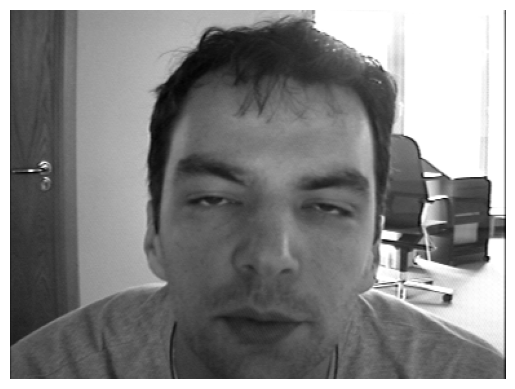

In [101]:
import matplotlib.pyplot as plt
from PIL import Image

# Open the PNG image
img_pgm = Image.open(image_paths[1020])

# Display the image using matplotlib
plt.imshow(img_pgm, cmap='gray')  # Use 'gray' colormap for grayscale
plt.axis('off')  # Turn off axis
plt.show()

In [102]:
class PupilDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        # Convert labels to tensors here
        self.labels = [torch.tensor(label, dtype=torch.float32) for label in labels]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = plt.imread(self.image_paths[idx])
        if len(image.shape) == 2:
            image = np.stack([image] * 3, axis=-1)
        image = Image.fromarray((image * 255).astype(np.uint8))
        if self.transform:
            image = self.transform(image)
        else:
            image = transforms.ToTensor()(image)
        label = self.labels[idx]
        return image, label


In [103]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [104]:

train_dataset = PupilDataset(image_paths=image_paths_train, labels=eye_positions_train, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)


In [105]:
test_dataset = PupilDataset(image_paths=image_paths_test, labels=eye_positions_test, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=4)


In [106]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # Import this for activation and pooling functions

class PupilDetectorCNN(nn.Module):
    def __init__(self):
        super(PupilDetectorCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)

        # Dummy input to determine the output size of convolutional layers
        self.dummy_input = torch.zeros(1, 3, 128, 128)  # Adjust size to match your input dimensions
        self._get_conv_output_size()

        self.fc1 = nn.Linear(self.conv_out_size, 128)
        self.fc2 = nn.Linear(128, 4)  # Output 4 coordinates (x1, y1, x2, y2)

    def _get_conv_output_size(self):
        # Pass dummy input through conv layers
        x = self.dummy_input
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2)
        self.conv_out_size = x.numel()  # Number of elements in the output tensor

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [107]:
criterion = nn.MSELoss()


In [111]:
import torch.optim as optim

model = PupilDetectorCNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 50


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()  # Clear gradients for the next training step
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update model weights

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 batches
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100}")
            running_loss = 0.0



Shape of all_predictions: (305, 4)
Shape of all_labels: (305, 4)


Skipping plotting for index 304 due to insufficient label dimensions.
Skipping plotting for index 200 due to insufficient label dimensions.
Skipping plotting for index 115 due to insufficient label dimensions.
Skipping plotting for index 164 due to insufficient label dimensions.
Skipping plotting for index 49 due to insufficient label dimensions.


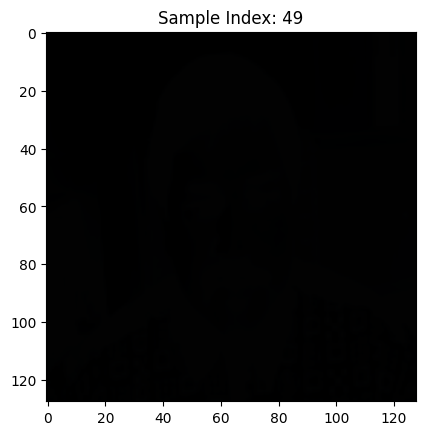

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Set the model to evaluation mode
model.eval()

# Initialize lists to store predictions and true values
all_predictions = []
all_labels = []

# Disable gradient calculations
with torch.no_grad():
    for inputs, labels in test_loader:
        # Forward pass
        outputs = model(inputs)

        # Collect predictions and true labels
        all_predictions.append(outputs.numpy())
        all_labels.append(labels.numpy())

# Convert lists to numpy arrays
all_predictions = np.concatenate(all_predictions, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Reshape all_labels if needed
if all_labels.shape[1] == 1:
    all_labels = all_labels.squeeze(axis=1)  # Remove the second dimension if it's 1

# Check the shapes and contents
print("Shape of all_predictions:", all_predictions.shape)
print("Shape of all_labels:", all_labels.shape)

# Plot a few sample images with true and predicted coordinates
sample_indices = np.random.choice(len(test_loader.dataset), 5, replace=False)
for idx in sample_indices:
    # Retrieve image and label using the same index
    image, true_label = test_loader.dataset[idx]
    pred_label = all_predictions[idx]

    # Convert image to numpy array for plotting
    image = image.numpy().transpose(1, 2, 0)  # Convert from CxHxW to HxWxC

    # Normalize image data if necessary
    if image.max() > 1:  # Assuming image data is in the range [0, 255]
        image = image / 255.0  # Normalize to [0, 1]

    # Display the image
    plt.imshow(image)
    plt.title(f"Sample Index: {idx}")

    # Ensure both true and predicted labels have exactly four values
    if len(true_label) == 4 and len(pred_label) == 4:
        # Plot true pupil locations
        plt.scatter([true_label[0], true_label[2]], [true_label[1], true_label[3]], c='r', label='True')
        # Plot predicted pupil locations
        plt.scatter([pred_label[0], pred_label[2]], [pred_label[1], pred_label[3]], c='b', label='Predicted')
        plt.legend()
        plt.show()
    else:
        print(f"Skipping plotting for index {idx} due to insufficient label dimensions.")


Sample Index: 102
True Label: tensor([[231., 113., 175., 112.]])
Predicted Label: [207.19275   91.24629  152.27357   89.613594]


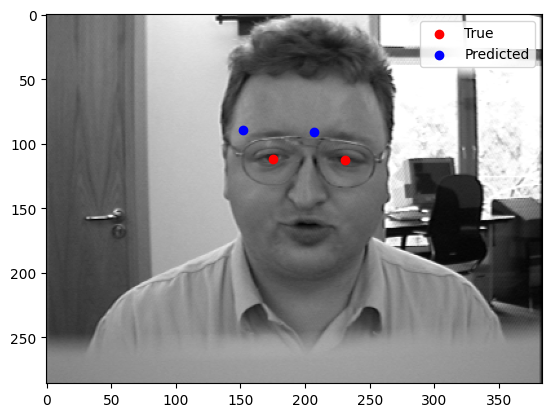

Sample Index: 180
True Label: tensor([[220., 122., 163., 122.]])
Predicted Label: [218.66463  96.43789 160.6953   94.81405]


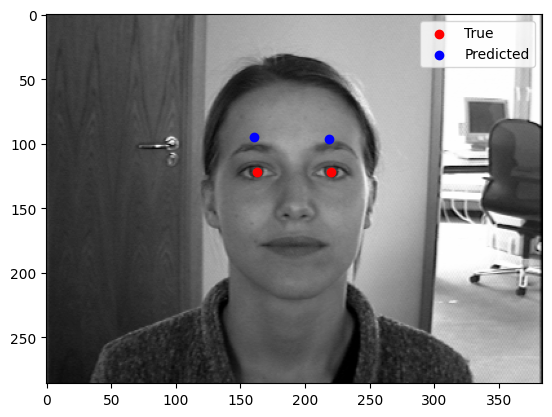

Sample Index: 218
True Label: tensor([[240., 121., 195., 119.]])
Predicted Label: [201.4549    88.528435 148.14406   87.18983 ]


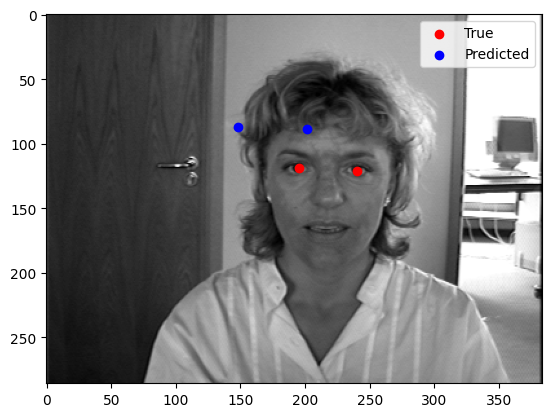

Sample Index: 297
True Label: tensor([[198., 102., 147.,  99.]])
Predicted Label: [210.92654  92.62631 154.66568  91.12966]


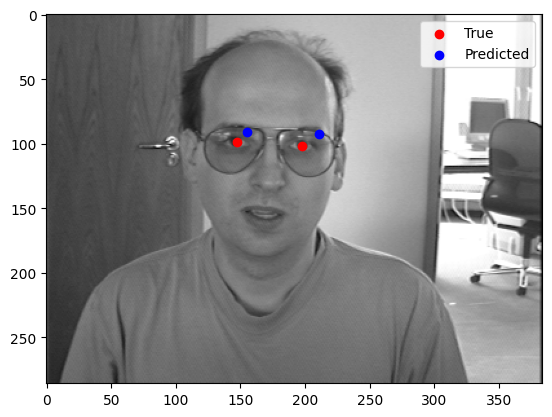

Sample Index: 129
True Label: tensor([[218.,  78., 136.,  80.]])
Predicted Label: [201.21649  89.12636 147.79732  87.51945]


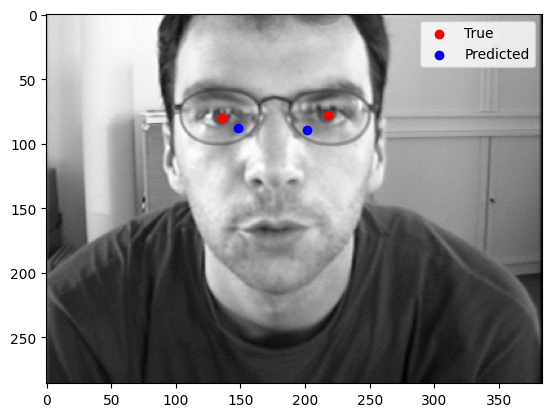

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Select a few sample indices
sample_indices = np.random.choice(len(test_loader.dataset), 5, replace=False)
for idx in sample_indices:
    image_path = test_loader.dataset.image_paths[idx]
    true_label = test_loader.dataset.labels[idx]
    pred_label = all_predictions[idx]

    # Print to debug
    print(f"Sample Index: {idx}")
    print("True Label:", true_label)
    print("Predicted Label:", pred_label)

    # Convert to numpy arrays if necessary
    true_label = np.array(true_label).flatten()
    pred_label = np.array(pred_label).flatten()

    # Load and display the image
    image = plt.imread(image_path)
    plt.imshow(image, cmap='gray')

    # Check dimensions before plotting
    if len(true_label) == 4 and len(pred_label) == 4:
        # Plot true pupil locations
        plt.scatter([true_label[0], true_label[2]], [true_label[1], true_label[3]], c='r', label='True')
        # Plot predicted pupil locations
        plt.scatter([pred_label[0], pred_label[2]], [pred_label[1], pred_label[3]], c='b', label='Predicted')
        plt.legend()
        plt.show()
    else:
        print("Skipping plotting due to insufficient label dimensions.")
